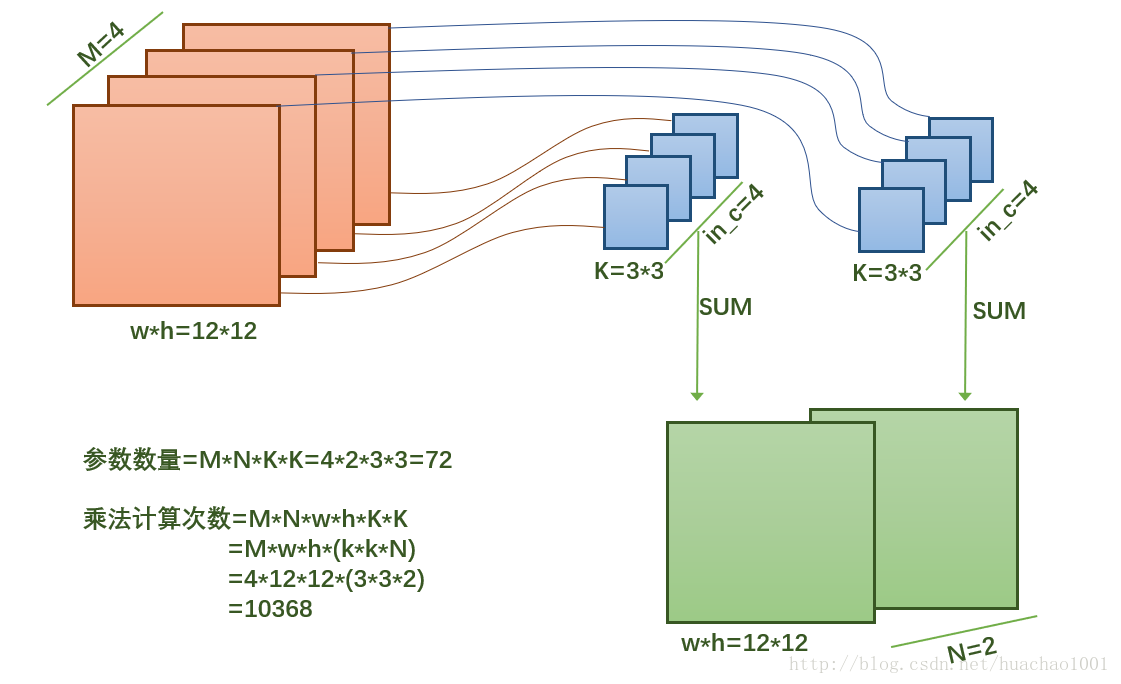

In [1]:
#出处：https://blog.cs 
from IPython.display import Image
Image(filename="./normal_Con.png")
#普通的卷积


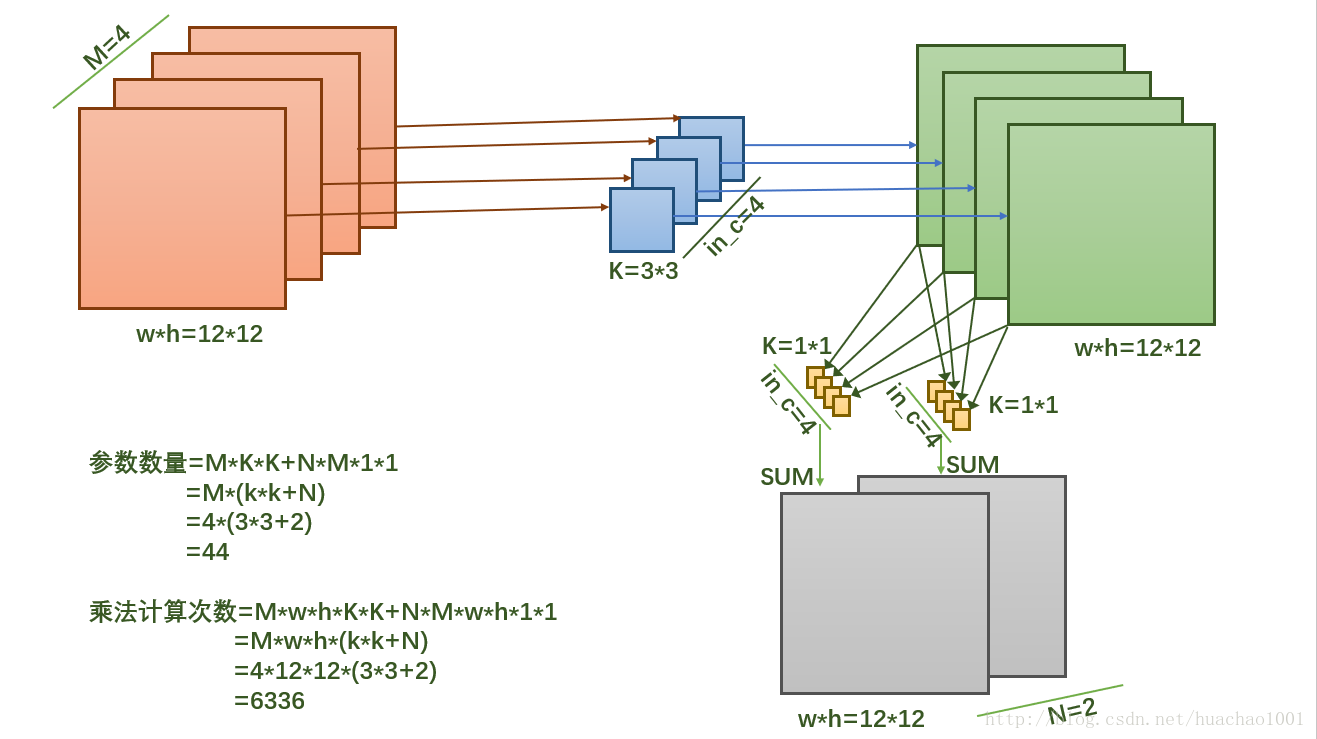

In [2]:
#相比普通卷积，MobileNet采用的方法是，将卷积分解为2个操作：depthwise和pointwise。pointwise比较容易理解，
#就是普通的卷积核为1*1的卷积。depthwise采用的方法不是普通卷积方式，我们知道，对于输入通道数为4的feature map在计算卷积时，
#输出的每个通道都需要对应4个3*3卷积核参数。这一步是最主要的耗时，为了提升计算速度，MobileNet把每个输入feature map对应一个3*3卷积核，
#输出通道数不变，即为4。而真正对通道数做改变的是在pointwise，也就是1*1的卷积。

from IPython.display import Image
Image(filename="./mobilenet.png")

In [3]:
import numpy as np
input_data=[
              [[1,0,1,2,1],
               [0,2,1,0,1],
               [1,1,0,2,0],
               [2,2,1,1,0],
               [2,0,1,2,0]],

               [[2,0,2,1,1],
                [0,1,0,0,2],
                [1,0,0,2,1],
                [1,1,2,1,0],
                [1,0,1,1,1]] 
            ]
weights_data=[ 
               [[ 1, 0, 1],
                [-1, 1, 0],
                [ 0,-1, 0]],
               [[-1, 0, 1],
                [ 0, 0, 1],
                [ 1, 1, 1]] 

           ]

#fm:[h,w]
#kernel:[k,k]
#return rs:[h,w] 
def compute_conv(fm,kernel):
    [h,w]=fm.shape
    [k,_]=kernel.shape 
    r=int(k/2)
    #定义边界填充0后的map
    padding_fm=np.zeros([h+2,w+2],np.float32)
    #保存计算结果
    rs=np.zeros([h,w],np.float32)
    #将输入在指定该区域赋值，即除了4个边界后，剩下的区域
    padding_fm[1:h+1,1:w+1]=fm 
    #对每个点为中心的区域遍历
    for i in range(1,h+1):
        for j in range(1,w+1): 
            #取出当前点为中心的k*k区域
            roi=padding_fm[i-r:i+r+1,j-r:j+r+1]
            #计算当前点的卷积,对k*k个点点乘后求和
            rs[i-1][j-1]=np.sum(roi*kernel)

    return rs

def my_depthwise(chw_input,chw_weights):
    [c,_,_]=chw_input.shape
    [_,k,_]=chw_weights.shape
    #outputs=np.zeros([h,w],np.float32)
    outputs=[] #注意跟conv的区别
    #对每个feature map遍历，从而对每个feature map进行卷积
    for i in range(c):
        #feature map==>[h,w]
        f_map=chw_input[i]
        #kernel ==>[k,k]
        w=chw_weights[i]

        rs =compute_conv(f_map,w)
        #outputs=outputs+rs   
        outputs.append(rs) #注意跟conv的区别
    return np.array( outputs)

def main():  

    #shape=[c,h,w]
    input = np.asarray(input_data,np.float32)
    #shape=[in_c,k,k]
    weights =  np.asarray(weights_data,np.float32) 
    rs=my_depthwise(input,weights) 
    print(rs) 


if __name__=='__main__':
    main() 


[[[ 1. -3.  0.  1. -2.]
  [-1.  3.  1. -1.  3.]
  [ 1. -1.  0.  3. -2.]
  [ 1.  1.  1. -2.  1.]
  [ 4.  1.  4.  2. -1.]]

 [[ 1.  3.  2.  3.  2.]
  [ 2.  1.  3.  4.  2.]
  [ 3.  4.  5.  6.  1.]
  [ 2.  3.  5.  4.  0.]
  [ 1.  2.  1. -1. -1.]]]


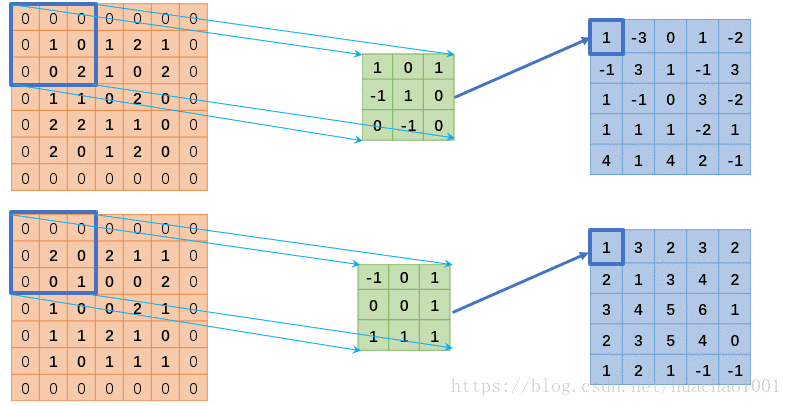

In [4]:
from IPython.display import Image
Image(filename="./mobilenet.gif")